# Visualizing gredient decent

##### “Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function."

##### Gradient descent is an iterative technique commonly used in Machine Learning and Deep Learning to try to find the best possible set of parameters/coefficients for a given model, data points, and loss function, starting from an initial, and usually, random guess.

### Linear model 
y = b + wx * e

y = output
x = input
b = biased term
w = weight
e = noise

salary =  basic + no of exp * annual growth + commission


In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [10]:
true_b = 1;
true_w = 2

N =100

np.random.seed(42)

x = np.random.rand(N,1)
epsilon =  .1 * np.random.rand(N,1)

y =  true_b + true_w*x + epsilon


print('x :: ',x[:5],'\n y :: ',y[:5])

x ::  [[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]] 
 y ::  [[1.75222316]
 [2.96506965]
 [2.49542348]
 [2.24817404]
 [1.40279393]]


In [12]:
## shuffle the index

np.arange(N)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [14]:
idx = np.arange(N)

np.random.shuffle(idx)
idx

array([58, 73, 94, 42, 10,  1, 60, 55, 87,  9, 23, 47, 38,  3, 99, 20, 17,
       30, 32, 26, 95, 98, 71, 72, 63, 91, 40, 97, 77, 68, 37, 76, 45,  2,
       28, 79, 66, 67, 43, 80, 83, 89, 33, 96,  0, 11,  8, 22, 84, 36, 25,
       27, 81, 16, 18, 29, 74, 49, 12, 92, 90, 39, 54, 34, 46,  5,  4, 70,
       52, 93, 59, 53, 88, 69, 41, 51, 48, 78, 82, 21, 61, 85, 57, 24, 50,
       62, 31, 65, 14, 86, 75, 13, 15,  7, 64, 19, 44, 35, 56,  6])

In [18]:
train_idx = idx[:int(N*.8)]
train_idx

array([58, 73, 94, 42, 10,  1, 60, 55, 87,  9, 23, 47, 38,  3, 99, 20, 17,
       30, 32, 26, 95, 98, 71, 72, 63, 91, 40, 97, 77, 68, 37, 76, 45,  2,
       28, 79, 66, 67, 43, 80, 83, 89, 33, 96,  0, 11,  8, 22, 84, 36, 25,
       27, 81, 16, 18, 29, 74, 49, 12, 92, 90, 39, 54, 34, 46,  5,  4, 70,
       52, 93, 59, 53, 88, 69, 41, 51, 48, 78, 82, 21])

In [19]:
test_idx = idx[int(N*.8):]
test_idx

array([61, 85, 57, 24, 50, 62, 31, 65, 14, 86, 75, 13, 15,  7, 64, 19, 44,
       35, 56,  6])

In [21]:
x_train, y_train = x[train_idx],y[train_idx]
x_test , y_test = x[test_idx],y[test_idx]

print('x_train {}'.format(x_train[:5]))

x_train [[0.04522729]
 [0.81546143]
 [0.77096718]
 [0.03438852]
 [0.02058449]]


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

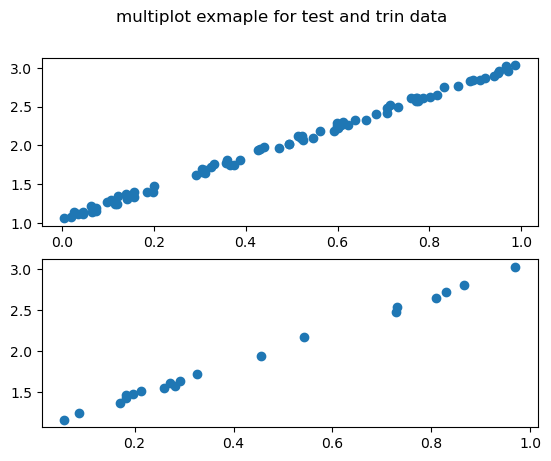

In [33]:
fig, (ax1, ax2 ) =  plt.subplots(2)
fig.suptitle('multiplot exmaple for test and trin data')
ax1.scatter(x_train,y_train)
ax2.scatter(x_test,y_test)

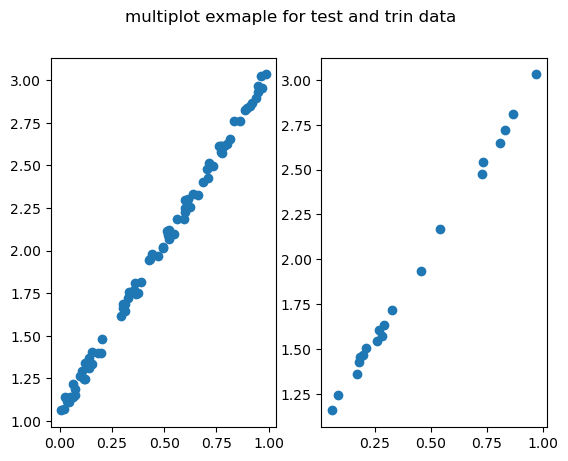

In [32]:
fig, (ax1, ax2 ) =  plt.subplots(1,2)
fig.suptitle('multiplot exmaple for test and trin data')
ax1.scatter(x_train,y_train)
ax2.scatter(x_test,y_test)

### gredient decent Step 0 - Random initialization#


In [41]:
# training a model, you need to randomly initialize the parameters/weights. In our case, we only have two: b and w.

np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
b, w

(array([0.49671415]), array([-0.1382643]))

In [42]:
### forward pass
yhat = b = w * x_train

print('yhat {}'.format(y[:5]))

yhat [[1.75222316]
 [2.96506965]
 [2.49542348]
 [2.24817404]
 [1.40279393]]


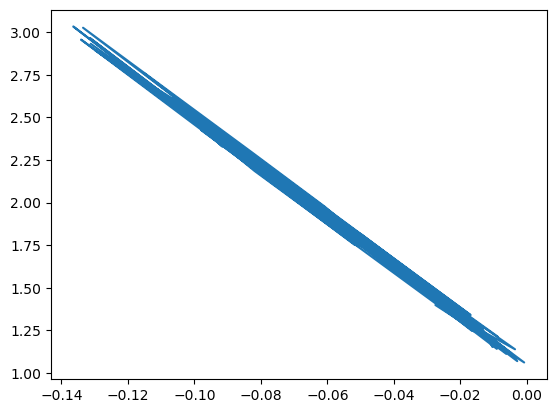

In [51]:
plt.plot(yhat, y_train)

In [52]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error! 
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

4.725501424914606


#### Step 2b - Computing the Loss Surface
